# Report - Laptop Price

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set(style='darkgrid')
sns.set_theme(style="ticks", rc=custom_params)

## Import a partir do .pkl

Removendo as colunas x_screen e y_screen pois no momento não são necessárias

In [152]:
df = pd.read_pickle("../datasets/processed/laptop_price.pkl")
df.drop(columns=['x_screen', 'y_screen'], inplace=True)

## Informações básicas do dataframe

In [153]:
df.head()

,company,typename,inches,screen_resolution,cpu_manufacturer,cpu_ghz,gpu_manufacturer,ram_gb,memory_principal_gb,memory_principal_type,memory_secondary_gb,memory_secondary_type,opsys,weight_kg,price_euros
0,Apple,Ultrabook,14-,2560x1600,Intel,2.3,Intel,8,128,ssd,0,empty,macOS,1.37,1339.69
1,Apple,Ultrabook,14-,1440x900,Intel,1.8,Intel,8,128,flash storage,0,empty,macOS,1.34,898.94
2,HP,Notebook,14~16,1920x1080,Intel,2.5,Intel,8,256,ssd,0,empty,Outros,1.86,575.00
3,Apple,Ultrabook,14~16,2880x1800,Intel,2.7,AMD,16,512,ssd,0,empty,macOS,1.83,2537.45
4,Apple,Ultrabook,14-,2560x1600,Intel,3.1,Intel,8,256,ssd,0,empty,macOS,1.37,1803.60


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   company                1302 non-null   category
 1   typename               1302 non-null   category
 2   inches                 1302 non-null   category
 3   screen_resolution      1302 non-null   category
 4   cpu_manufacturer       1302 non-null   category
 5   cpu_ghz                1302 non-null   float32 
 6   gpu_manufacturer       1302 non-null   category
 7   ram_gb                 1302 non-null   int16   
 8   memory_principal_gb    1302 non-null   int16   
 9   memory_principal_type  1302 non-null   category
 10  memory_secondary_gb    1302 non-null   int16   
 11  memory_secondary_type  1302 non-null   category
 12  opsys                  1302 non-null   category
 13  weight_kg              1302 non-null   float32 
 14  price_euros            1302 non-null   f

In [155]:
df.describe()

,cpu_ghz,ram_gb,memory_principal_gb,memory_secondary_gb,weight_kg,price_euros
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,2.299001,8.385561,442.930876,168.417819,2.039416,1124.043894
std,0.506467,5.085166,356.180662,402.746234,0.665274,699.158856
min,0.900000,2.000000,8.000000,0.000000,0.690000,174.000000
25%,2.000000,4.000000,256.000000,0.000000,1.500000,599.000000
50%,2.500000,8.000000,256.000000,0.000000,2.040000,978.000000
75%,2.700000,8.000000,512.000000,0.000000,2.300000,1488.435000
max,3.600000,64.000000,2000.000000,2000.000000,4.700000,6099.000000


In [156]:
df.select_dtypes(include='category').describe()

,company,typename,inches,screen_resolution,cpu_manufacturer,gpu_manufacturer,memory_principal_type,memory_secondary_type,opsys
count,1302,1302,1302,1302,1302,1302,1302,1302,1302
unique,19,6,3,15,2,3,4,4,4
top,Dell,Notebook,14~16,1920x1080,Intel,Intel,ssd,empty,Windows
freq,297,727,871,841,1240,722,843,1094,1125


### Ordenar os laptops pelo preço

In [157]:
df.sort_values(by=['price_euros'], ascending=False).head()

,company,typename,inches,screen_resolution,cpu_manufacturer,cpu_ghz,gpu_manufacturer,ram_gb,memory_principal_gb,memory_principal_type,memory_secondary_gb,memory_secondary_type,opsys,weight_kg,price_euros
196,Razer,Gaming,16+,3840x2160,Intel,2.9,Nvidia,32,1000,ssd,0,empty,Windows,3.49,6099.0
830,Razer,Gaming,16+,3840x2160,Intel,2.9,Nvidia,32,512,ssd,0,empty,Windows,3.49,5499.0
610,Lenovo,Notebook,14~16,3840x2160,Intel,3.1,Nvidia,32,1000,ssd,0,empty,Windows,2.50,4899.0
749,HP,Workstation,16+,1920x1080,Intel,2.9,Nvidia,16,256,ssd,0,empty,Windows,3.00,4389.0
1066,Asus,Gaming,16+,1920x1080,Intel,2.7,Nvidia,64,1000,ssd,0,empty,Windows,3.58,3975.0


In [158]:
df.sort_values(by=['price_euros'], ascending=True).head()

,company,typename,inches,screen_resolution,cpu_manufacturer,cpu_ghz,gpu_manufacturer,ram_gb,memory_principal_gb,memory_principal_type,memory_secondary_gb,memory_secondary_type,opsys,weight_kg,price_euros
1215,Acer,Netbook,14-,1366x768,Intel,1.50,Intel,2,32,ssd,0,empty,Outros,1.30,174.0
20,Asus,Netbook,14-,1366x768,Intel,1.44,Intel,2,32,flash storage,0,empty,Windows,0.98,191.9
1120,Vero,Notebook,14-,1920x1080,Intel,1.44,Intel,4,32,flash storage,0,empty,Windows,1.35,196.0
31,Asus,Notebook,14~16,1366x768,AMD,1.50,AMD,2,32,flash storage,0,empty,Windows,1.65,199.0
290,Acer,Notebook,14~16,1366x768,Intel,1.50,Intel,2,16,ssd,0,empty,Outros,2.19,199.0


### Verificar quantidade de valores únicos

In [159]:
print("Quantidade de Valores únicos por coluna")
for column in df.columns:
    print(f"{column}: {len(df[column].unique())}")

Quantidade de Valores únicos por coluna
company: 19
typename: 6
inches: 3
screen_resolution: 15
cpu_manufacturer: 2
cpu_ghz: 25
gpu_manufacturer: 3
ram_gb: 9
memory_principal_gb: 13
memory_principal_type: 4
memory_secondary_gb: 6
memory_secondary_type: 4
opsys: 4
weight_kg: 171
price_euros: 791


## Gráficos de barras (barplot)

### Gráficos de barra de média de preço

In [229]:
def create_bar(df_: pd, ax: plt.axes, x_: str, x_label: str, rot=45):
    df = df_.groupby(by=x_, as_index=False)['price_euros'].mean()
    try:
        df[x_] = df[x_].str.capitalize()
    except:
        pass
    
    sns.barplot(data=df, x=x_, y='price_euros', palette = "flare", ax=ax)
    for value in ax.containers:
        ax.bar_label(value)
    ax.tick_params(axis='x', labelrotation=rot, size=12)
    ax.tick_params(axis='y', size=12)
    ax.set_xlabel(x_label.capitalize(), fontsize='large', family='monospace')
    ax.set_ylabel("Preço (€)", fontsize='large', family='monospace')
    
    ax.set_title(f"Média de Preço dos Laptops por {x_label.capitalize()}", fontsize='large', fontweight='bold', 
            style='italic', family='monospace')

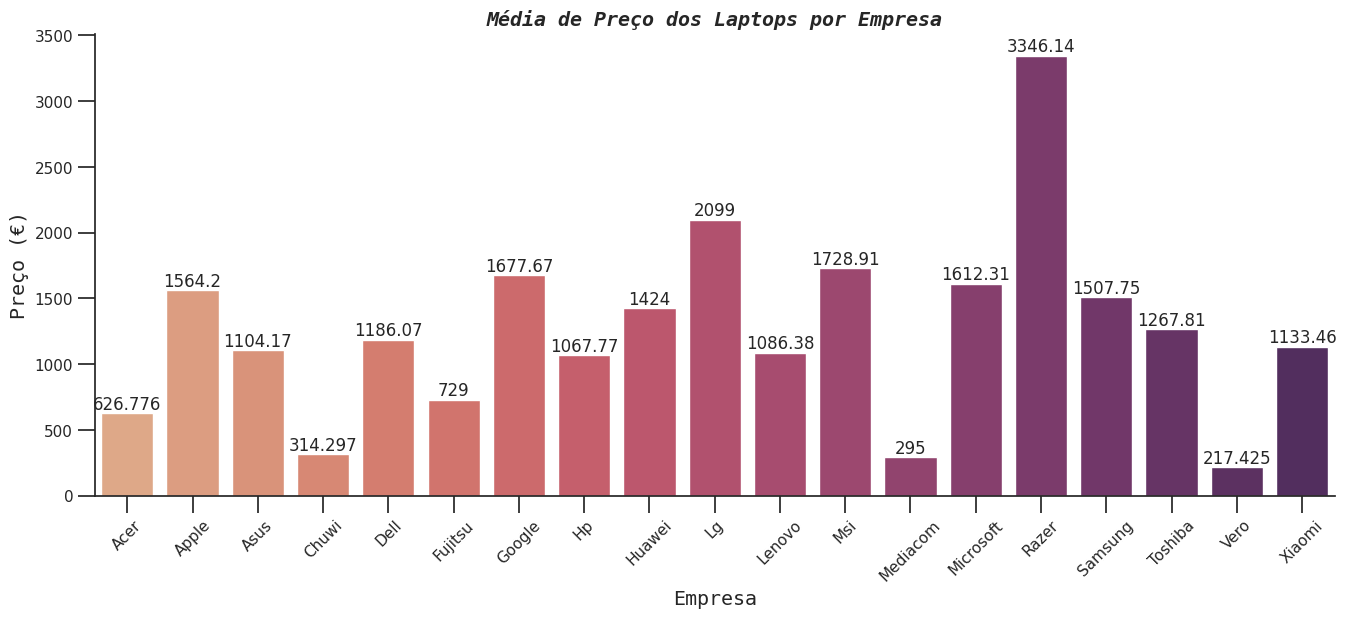

In [230]:
fig, ax = plt.subplots(figsize=(16, 6))
create_bar(df, ax, 'company', 'Empresa')
plt.show()

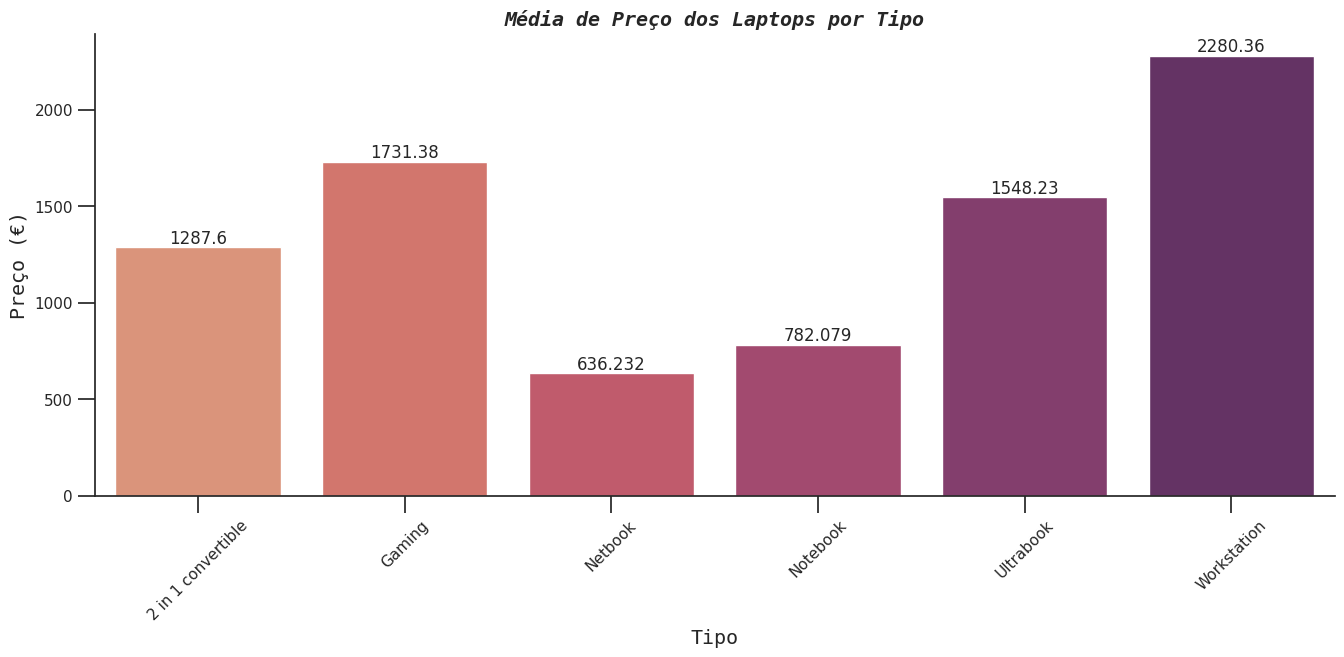

In [231]:
fig, ax = plt.subplots(figsize=(16, 6))
create_bar(df, ax, 'typename', 'Tipo')
plt.show()

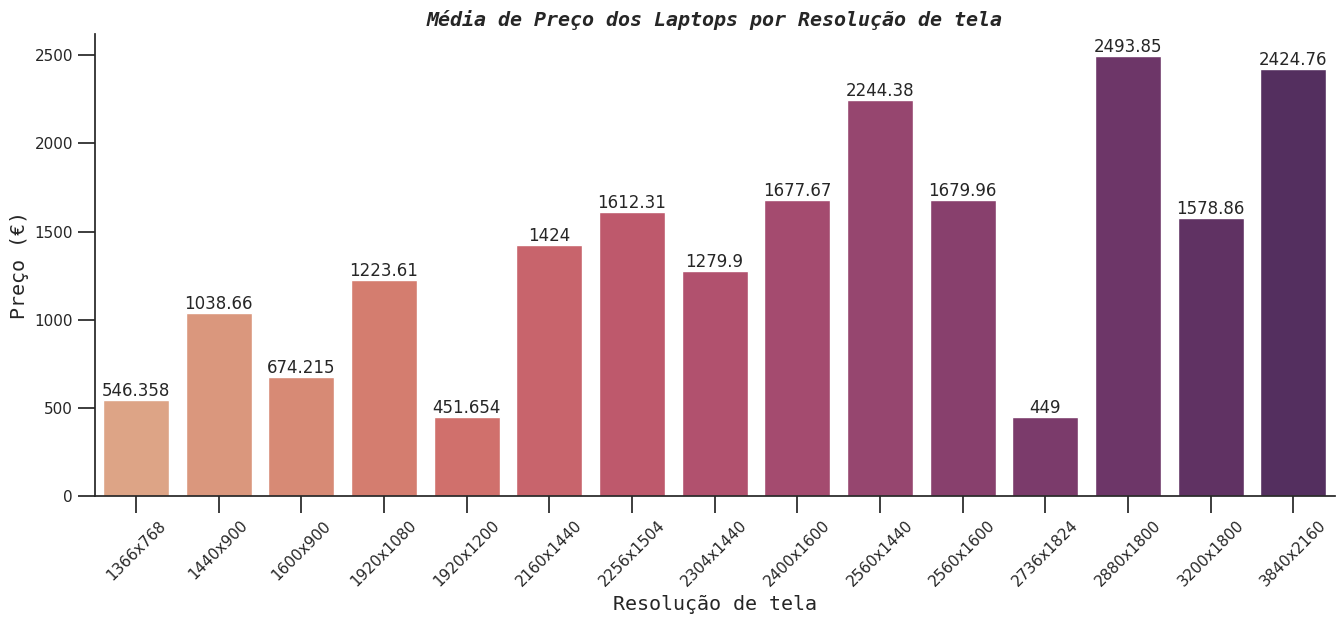

In [232]:
fig, ax = plt.subplots(figsize=(16, 6))
create_bar(df, ax, 'screen_resolution', 'Resolução de tela')
plt.show()

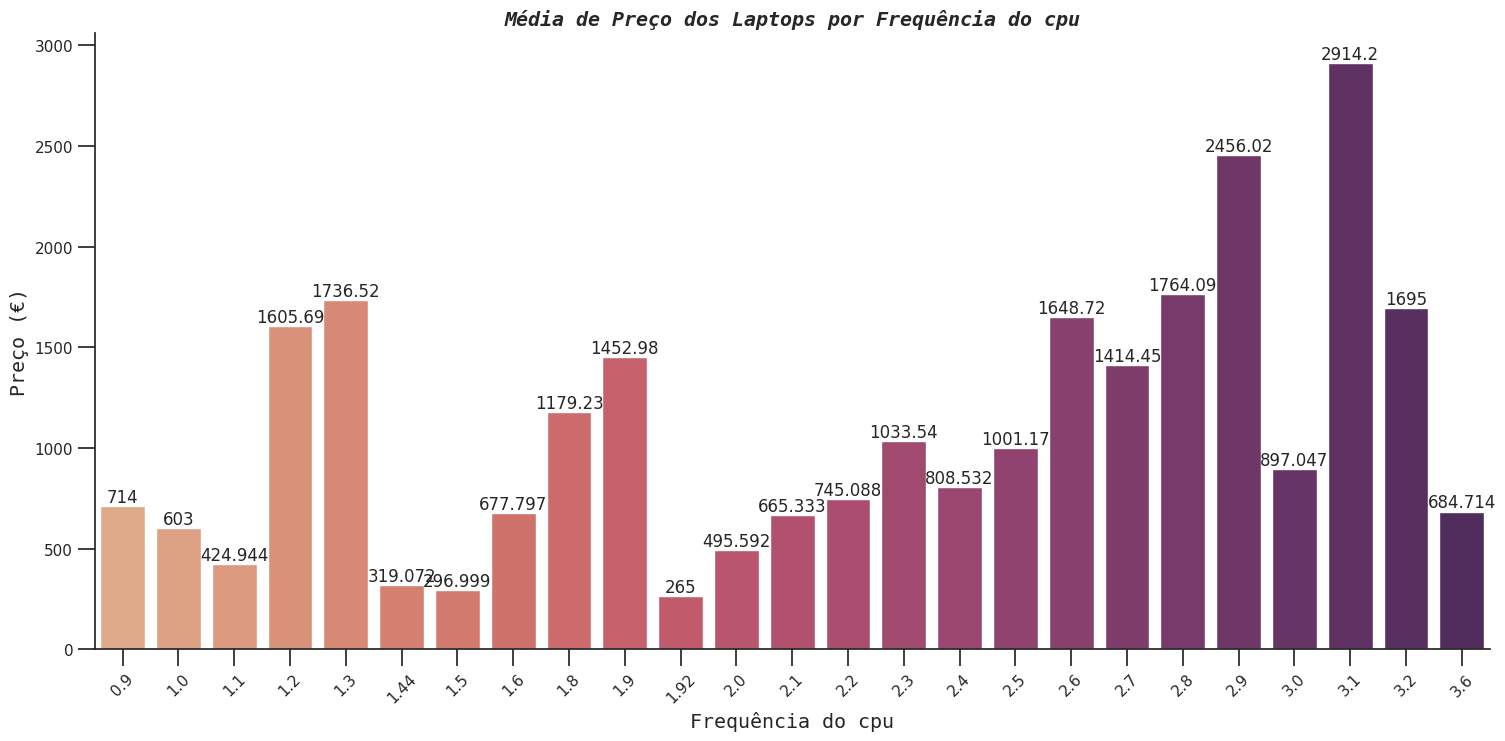

In [240]:
fig, ax = plt.subplots(figsize=(18, 8))
create_bar(df, ax, 'cpu_ghz', 'Frequência do cpu')
plt.show()

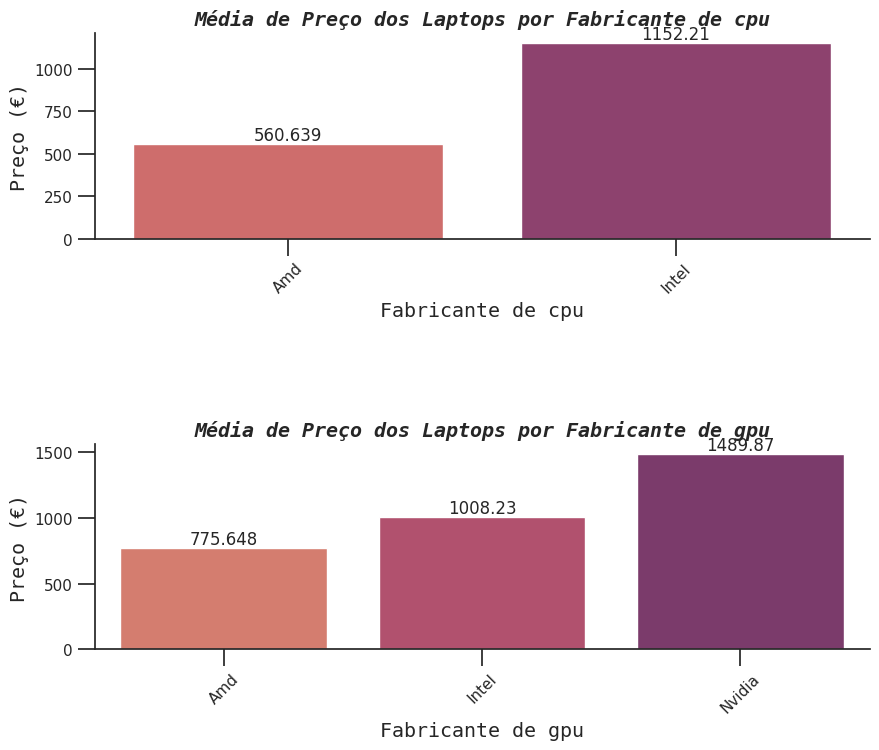

In [234]:
fig, (ax1, ax2) = plt.subplots((2), figsize=(10, 8))
create_bar(df, ax1, 'cpu_manufacturer', 'Fabricante de Cpu')
create_bar(df, ax2, 'gpu_manufacturer', 'Fabricante de Gpu')
plt.subplots_adjust(hspace=1)
plt.show()

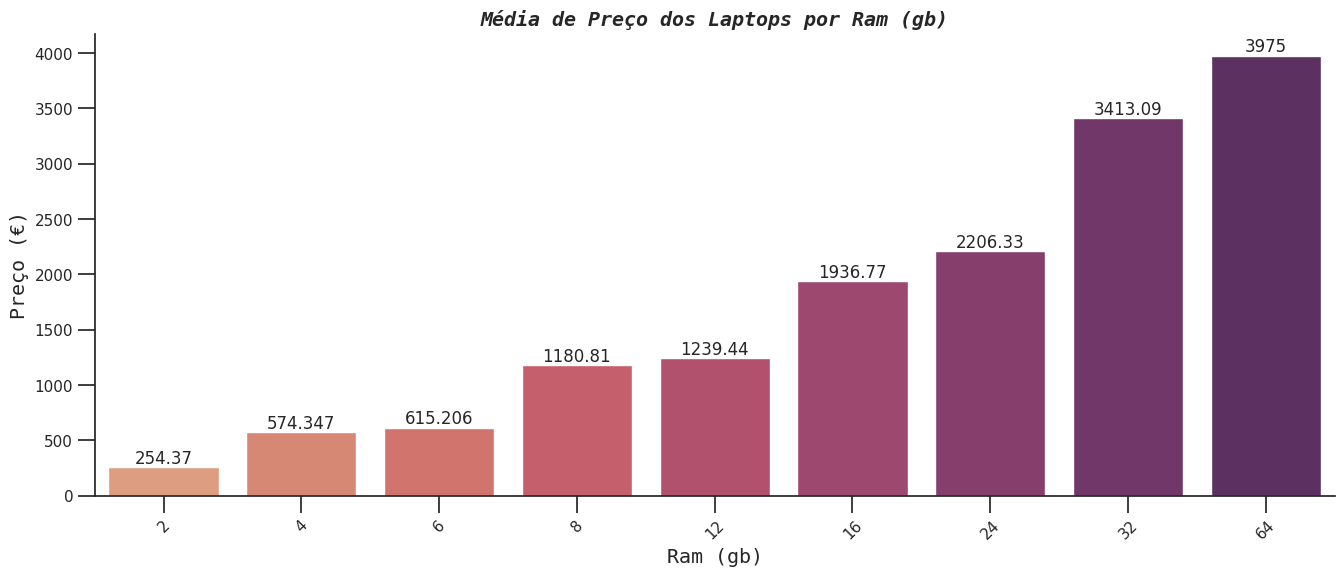

In [235]:
fig, ax = plt.subplots(figsize=(16, 6))
create_bar(df, ax, 'ram_gb', 'Ram (GB)')
plt.show()

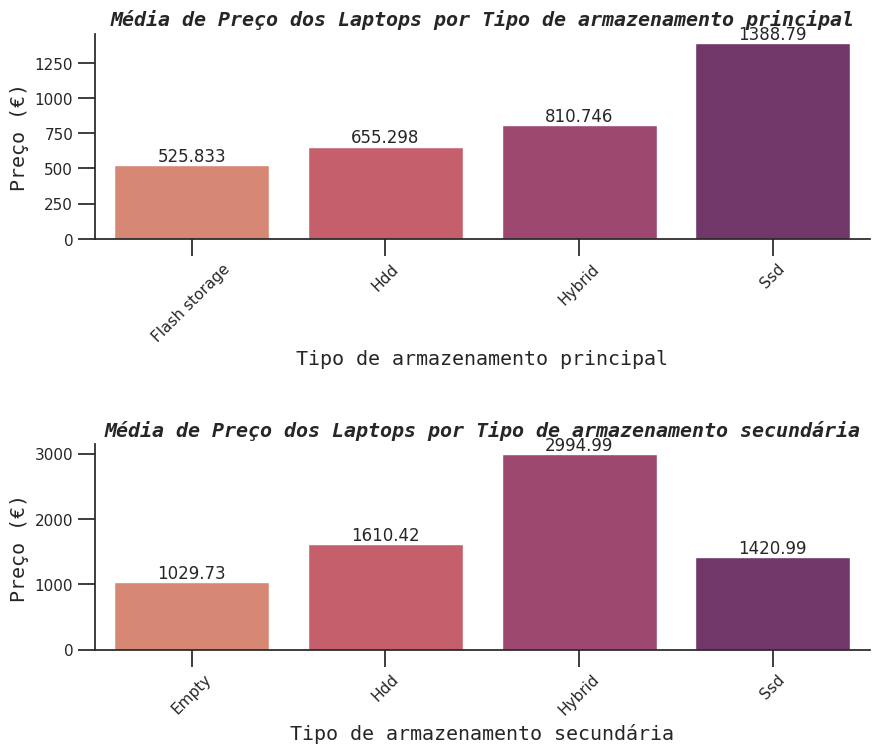

In [236]:
fig, (ax1, ax2) = plt.subplots((2), figsize=(10, 8))
create_bar(df, ax1, 'memory_principal_type', 'Tipo de Armazenamento Principal')
create_bar(df, ax2, 'memory_secondary_type', 'Tipo de Armazenamento Secundária')
plt.subplots_adjust(hspace=1)
plt.show()

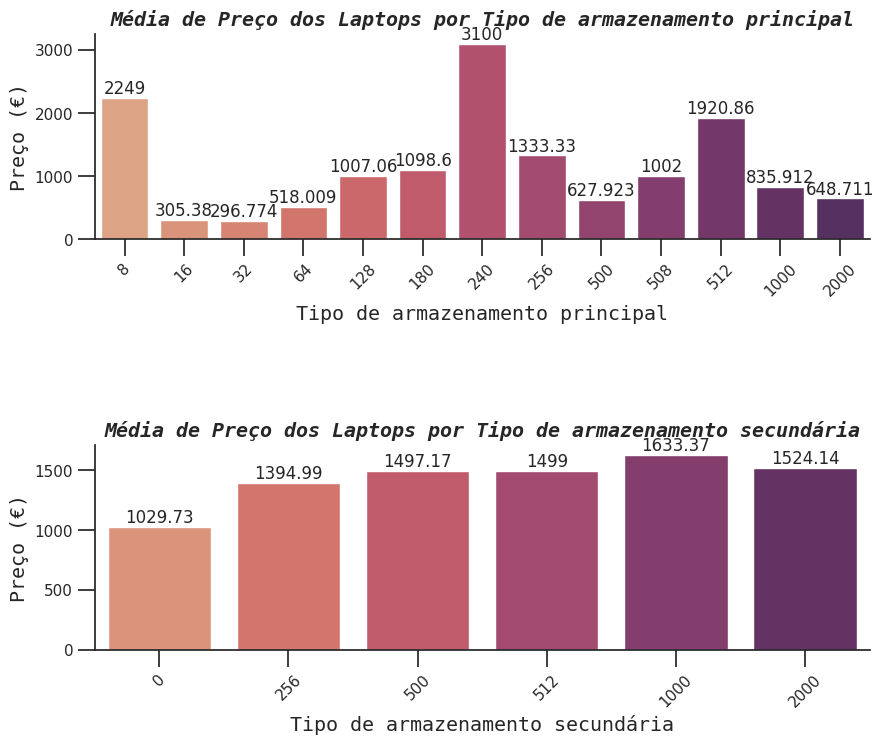

In [237]:
fig, (ax1, ax2) = plt.subplots((2), figsize=(10, 8))
create_bar(df, ax1, 'memory_principal_gb', 'Tipo de Armazenamento Principal')
create_bar(df, ax2, 'memory_secondary_gb', 'Tipo de Armazenamento Secundária')
plt.subplots_adjust(hspace=1)
plt.show()

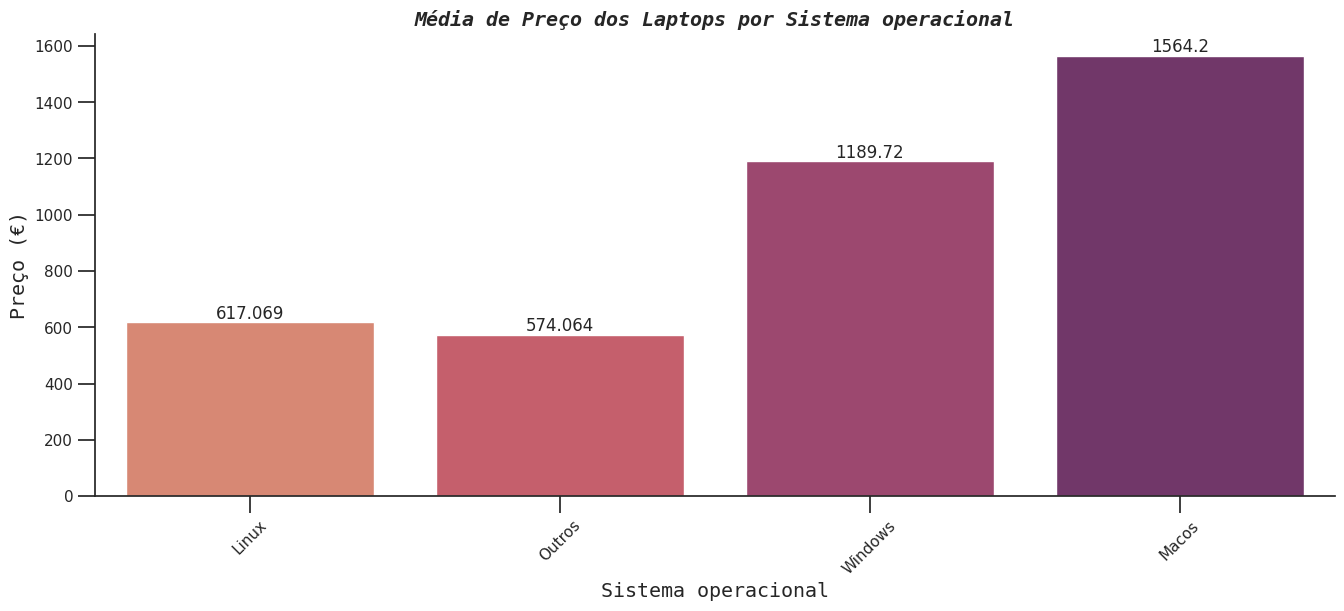

In [238]:
fig, ax = plt.subplots(figsize=(16, 6))
create_bar(df, ax, 'opsys', 'Sistema Operacional')
plt.show()

### Maximo e minimo de preços

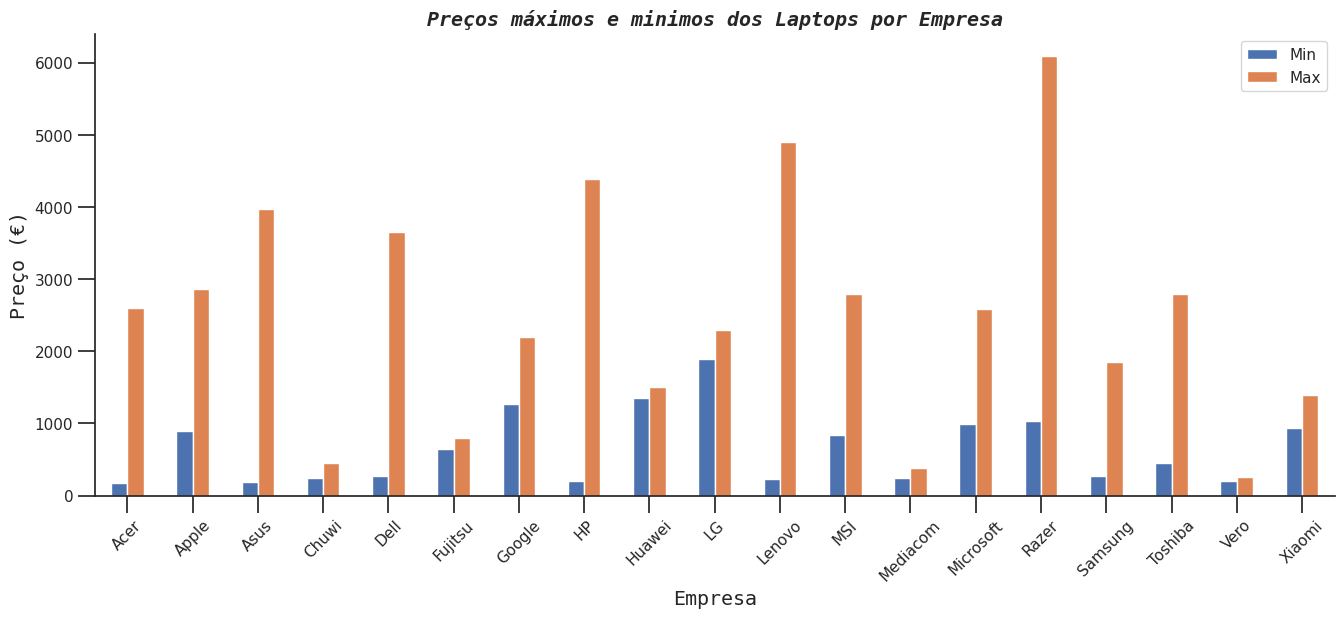

In [257]:
fig, ax = plt.subplots(figsize=(16, 6))
df_aux = pd.pivot_table(df, values='price_euros', index='company', aggfunc = ['min', 'max'])
df_aux.plot.bar(ax=ax)
ax.tick_params(axis='x', labelrotation=45, size=12)
ax.tick_params(axis='y', size=12)
ax.set_ylabel("Preço (€)", fontsize='large', family='monospace')
ax.set_xlabel('Empresa', fontsize='large', family='monospace')
ax.set_title("Preços máximos e minimos dos Laptops por Empresa", fontsize='large', fontweight='bold', 
            style='italic', family='monospace')
ax.legend(['Min', 'Max'])
plt.show()

### Diferenças entre maximo e minimo de preços

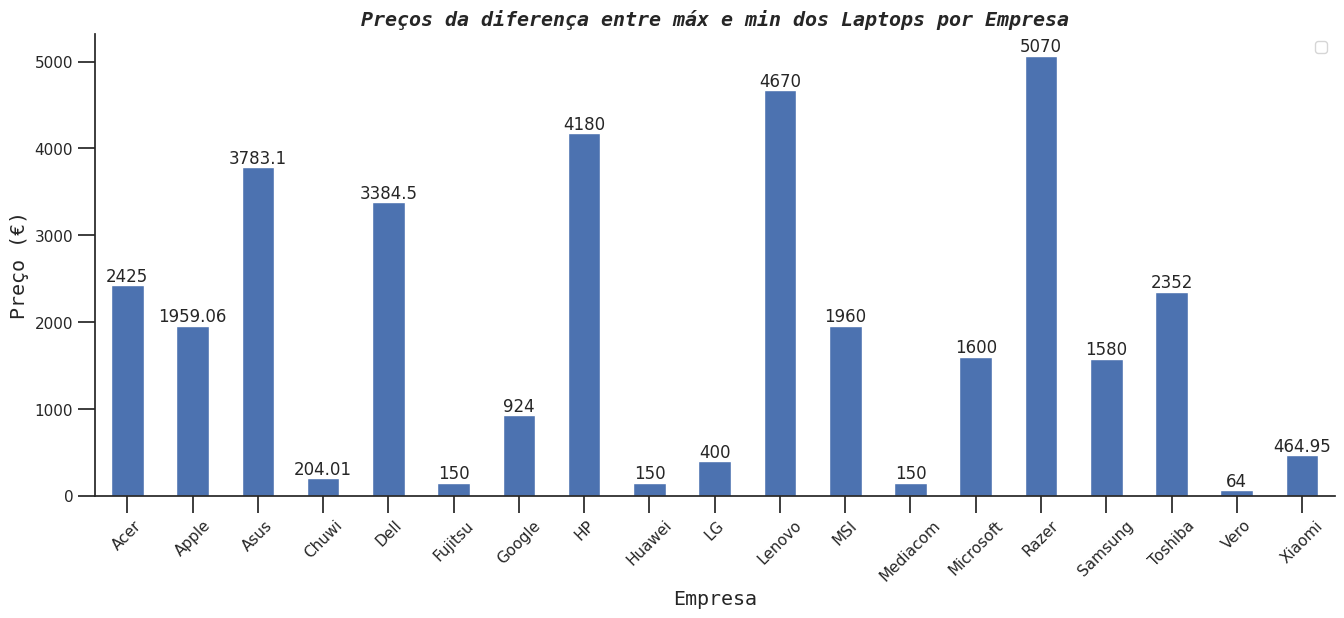

In [260]:
fig, ax = plt.subplots(figsize=(16, 6))
df_aux = pd.pivot_table(df, values='price_euros', index='company', aggfunc = 'max') - pd.pivot_table(df, values='price_euros', index='company', aggfunc = 'min')
df_aux.plot.bar(ax=ax)
for value in ax.containers:
    ax.bar_label(value)
ax.tick_params(axis='x', labelrotation=45, size=12)
ax.tick_params(axis='y', size=12)
ax.set_ylabel("Preço (€)", fontsize='large', family='monospace')
ax.set_xlabel('Empresa', fontsize='large', family='monospace')
ax.set_title("Preços da diferença entre máx e min dos Laptops por Empresa", fontsize='large', fontweight='bold', 
            style='italic', family='monospace')
ax.legend('')
plt.show()

### Média de armazenamento por empresas

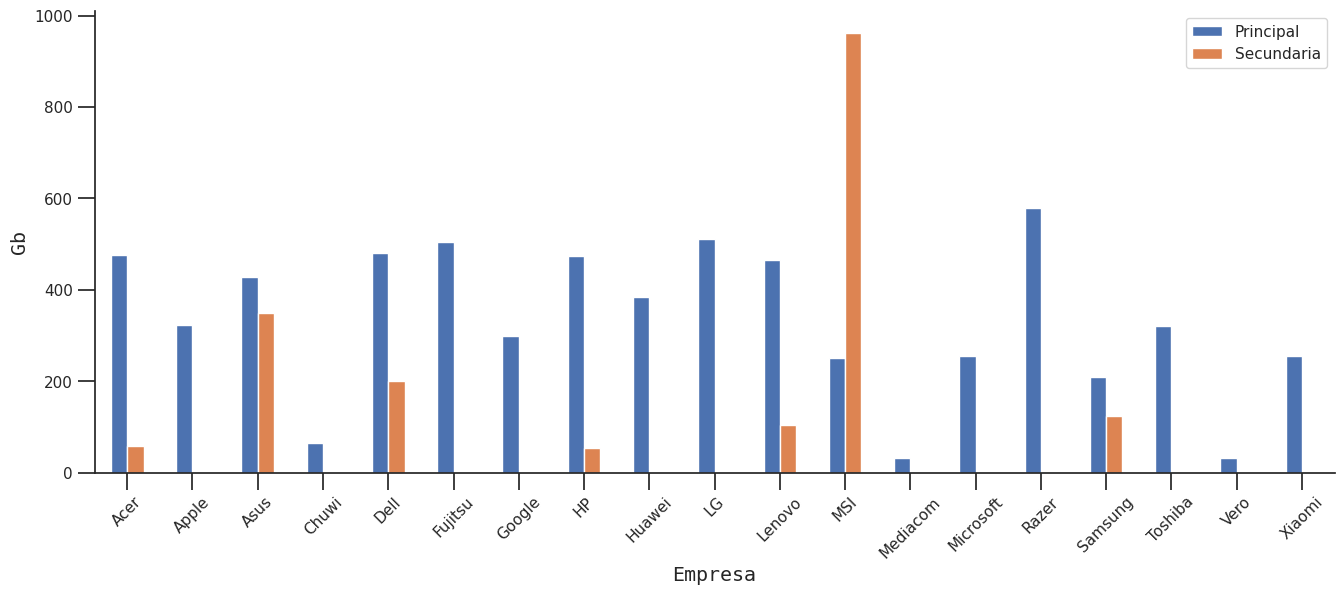

In [263]:
fig, ax = plt.subplots(figsize=(16, 6))
df_aux = pd.pivot_table(df, values=['memory_principal_gb', 'memory_secondary_gb'], index='company', aggfunc = np.mean)
df_aux.plot.bar(ax=ax)
ax.tick_params(axis='x', labelrotation=45, size=12)
ax.tick_params(axis='y', size=12)
ax.set_ylabel("Gb", fontsize='large', family='monospace')
ax.set_xlabel('Empresa', fontsize='large', family='monospace')
ax.legend(['Principal', 'Secundaria'])
plt.show()

## Gráficos de caixas (boxplot)

In [184]:
def create_box_plot(df: pd, ax: plt.axes, x_: str, title: str, rot=45):
    try:
        df[x_] = df[x_].str.capitalize()
    except:
        pass
    sns.boxplot(data=df, x=x_, y='price_euros',ax=ax)
    
    ax.tick_params(axis='x', labelrotation=rot, size=12)
    ax.tick_params(axis='y', size=12)
    ax.set_xlabel(title.capitalize(), fontsize='large', family='monospace')
    ax.set_ylabel("Preço (€)", fontsize='large', family='monospace')
    
    ax.set_title(f"Preço dos Laptops por {title.capitalize()}", fontsize='large', fontweight='bold', 
            style='italic', family='monospace')

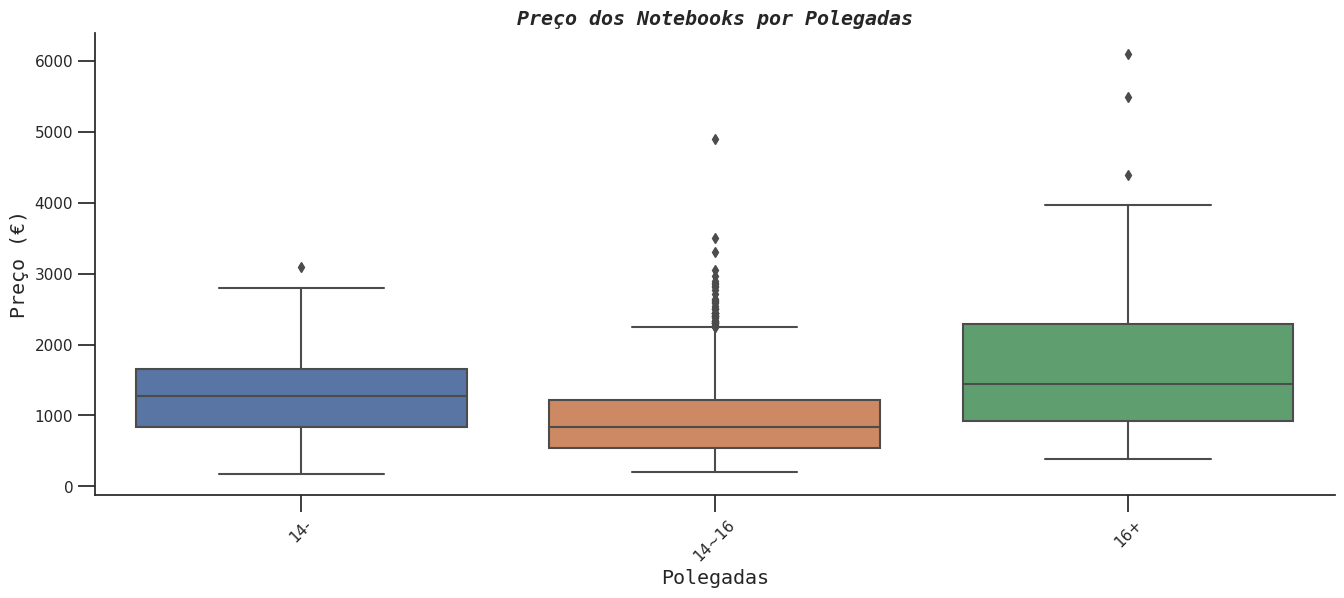

In [186]:
fig, ax = plt.subplots(figsize=(16, 6))
create_box_plot(df, ax, 'inches', 'Polegadas')
plt.show()

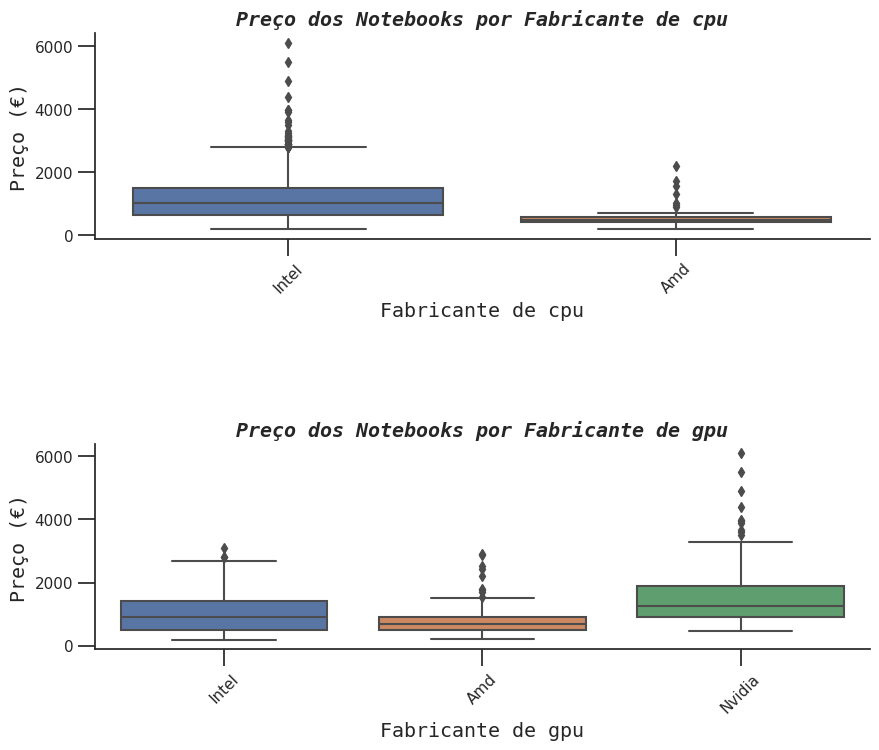

In [187]:
fig, (ax1, ax2) = plt.subplots((2), figsize=(10, 8))
create_box_plot(df, ax1, 'cpu_manufacturer', 'Fabricante de Cpu')
create_box_plot(df, ax2, 'gpu_manufacturer', 'Fabricante de Gpu')
plt.subplots_adjust(hspace=1)
plt.show()

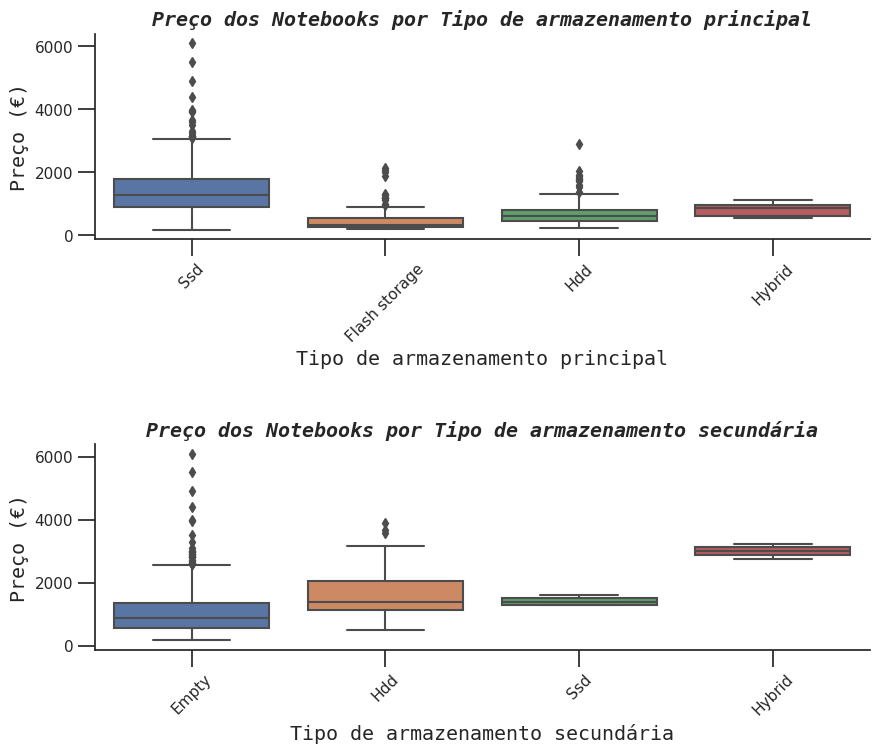

In [188]:
fig, (ax1, ax2) = plt.subplots((2), figsize=(10, 8))
create_box_plot(df, ax1, 'memory_principal_type', 'Tipo de Armazenamento Principal')
create_box_plot(df, ax2, 'memory_secondary_type', 'Tipo de Armazenamento Secundária')
plt.subplots_adjust(hspace=1)
plt.show()

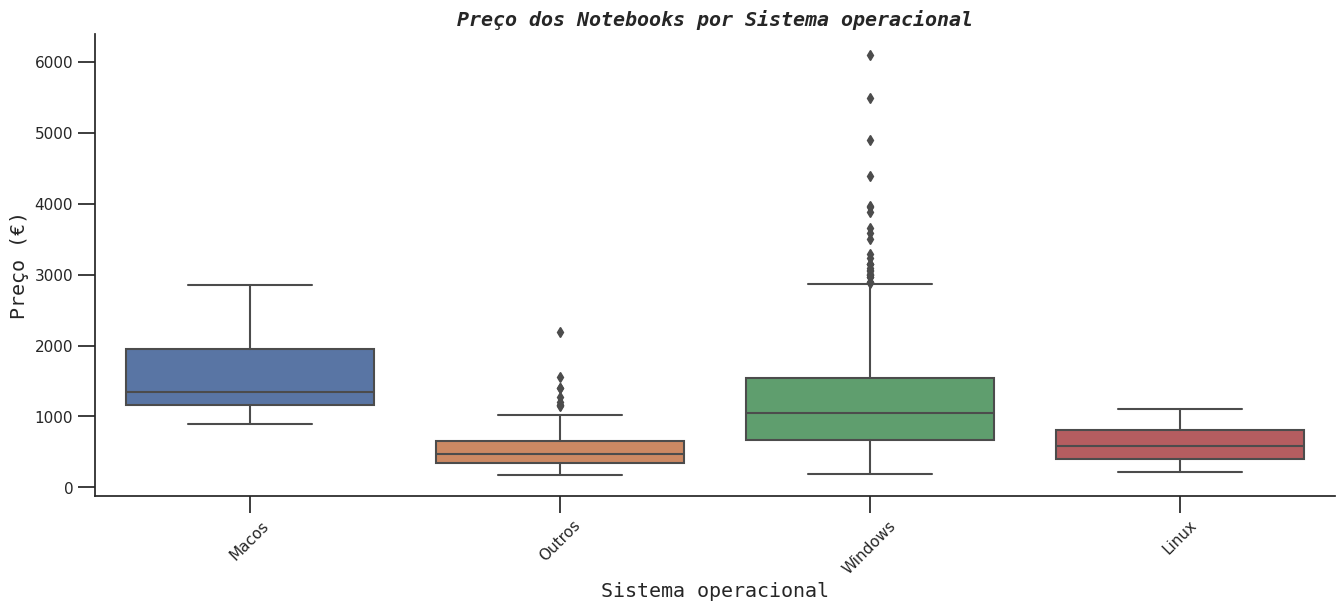

In [189]:
fig, ax = plt.subplots(figsize=(16, 6))
create_box_plot(df, ax, 'opsys', 'Sistema Operacional')
plt.show()

## Gráficos de pizza (pieplot)

In [200]:
def create_pie_plot(df_: pd, ax: plt.axes, x_: str, title: str, rot=45):
    df = df_.groupby(by=x_, as_index=False)['price_euros'].count()
    ax.pie(data=df, x='price_euros', labels=x_, autopct = "%1.2f%%", startangle = rot, colors = sns.color_palette('pastel')[0:5])
    ax.set_title(title)

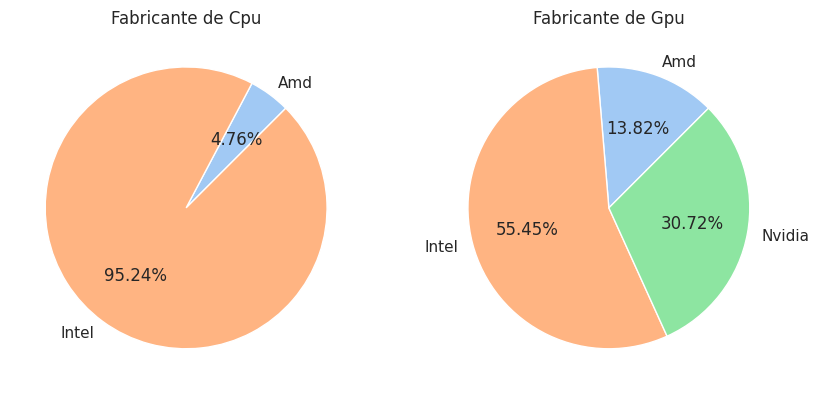

In [215]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
create_pie_plot(df, ax1, 'cpu_manufacturer', 'Fabricante de Cpu')
create_pie_plot(df, ax2, 'gpu_manufacturer', 'Fabricante de Gpu')
plt.show()

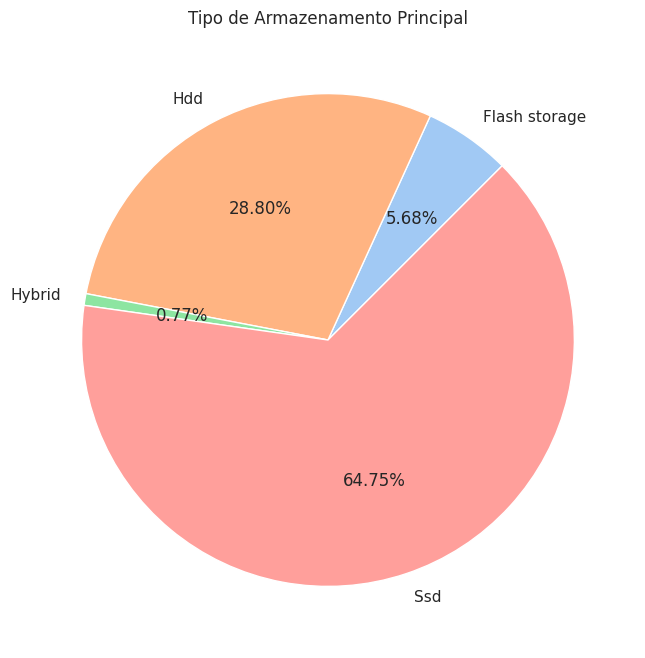

In [218]:
fig, ax = plt.subplots(figsize=(8, 8))
create_pie_plot(df, ax, 'memory_principal_type', 'Tipo de Armazenamento Principal')
plt.show()

## Gráfico de dispersão (scatterplot)

In [222]:
def create_scatter_plot(df: pd, ax: plt.axes, x_: str, title: str):
    sns.scatterplot(data=df, x=x_, y="price_euros", color = "mediumpurple", alpha = 0.75, ax=ax)
    ax.set_title(title)

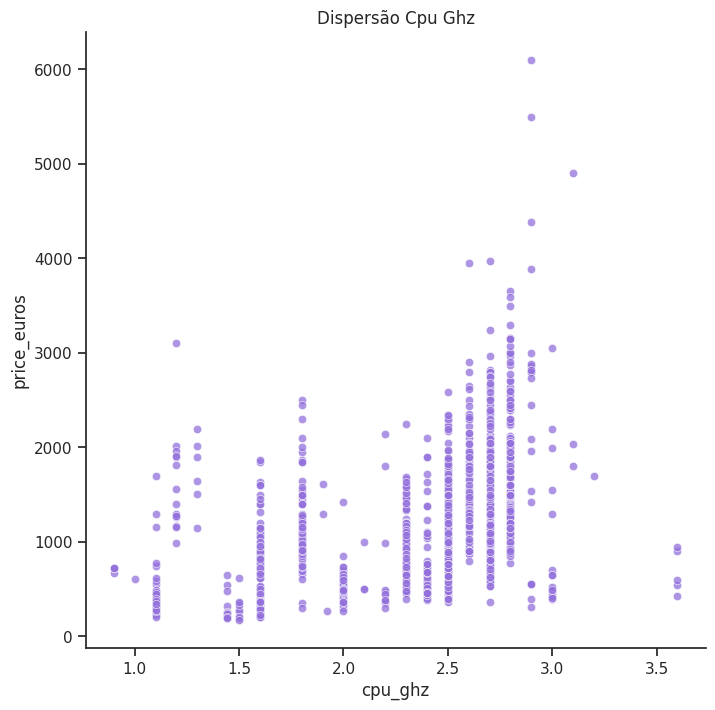

In [225]:
fig, ax = plt.subplots(figsize=(8, 8))
create_scatter_plot(df, ax, "cpu_ghz", "Dispersão Cpu Ghz")
plt.show()

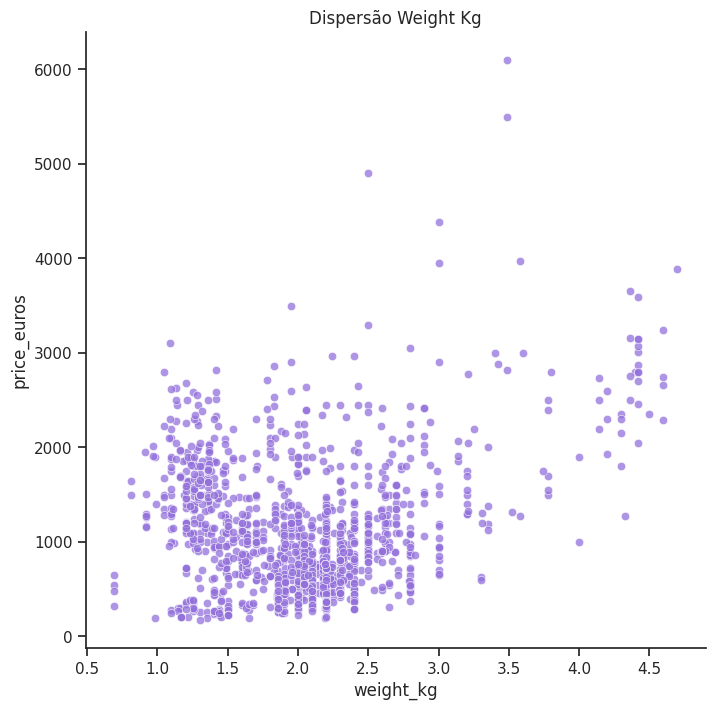

In [226]:
fig, ax = plt.subplots(figsize=(8, 8))
create_scatter_plot(df, ax, "weight_kg", "Dispersão Weight Kg")
plt.show()

## Correlação entre as variáveis - Heatmap

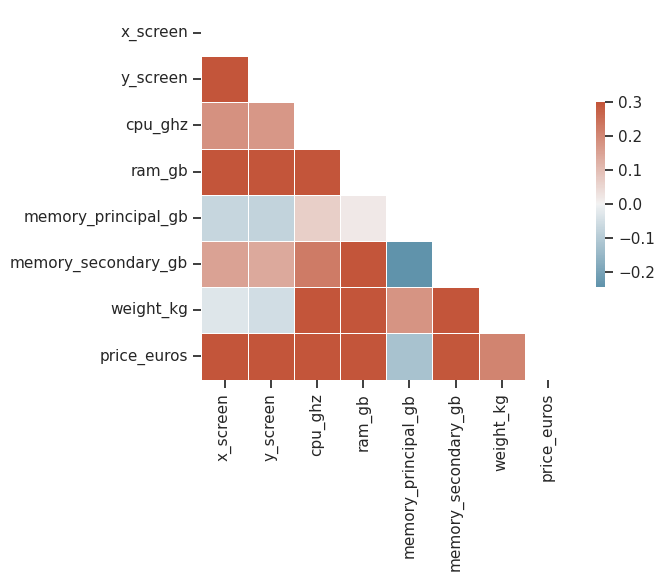

In [228]:
df = pd.read_pickle("../datasets/processed/laptop_price.pkl")
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()